<font color='red'>

# Giriş
<br>
<font color='blue'>
* Çoğu nüfuslu şehirdeki süpermarketlerin büyümesi artıyor ve pazar rekabetleri de yüksek. Veri seti, 3 ay boyunca 3 farklı branşta kayıt yapan süpermarket şirketinin tarihi satışlarından biridir. Öngörülen veri analizi yöntemlerinin bu veri kümesiyle uygulanması kolaydır.
    
    
<br>
<font color='black'>

- Invoice id::(Fatura kimliği) Bilgisayarda oluşturulan satış fişi fatura kimlik numarası
- Branch(Şube):: Süper merkezin dalı (A, B ve C ile 3 dal mevcuttur) 
- City(Kent):: Süper merkezlerin yeri
- Customer type(Müşteri tipi):: Üye kartı olan ve olmayan
- Gender(Cinsiyet):: Cinsiyet türü müşteri
- Product line(Ürün yelpazesi):: Genel ürün kategorileri grupları - Elektronik aksesuarlar, Moda aksesuarları, Yiyecek ve içecekler, Sağlık ve güzellik, Ev ve yaşam tarzı, Spor ve seyahat

- Unit price(Birim fiyatı):: Her ürünün fiyatı $
- Tax(Vergi):: müşteri satın almalarında vergi ücreti uygulanır

- Total(Toplam Fiyat):: Vergi dahil toplam fiyat
        
- Date(Satın Alma Tarihi):: Ocak 2019 ile Mart 2019 arasında kayıt yapılabilir
- Time(Satın Alma Saati):: Satın alma süresi (10:00 - 21:00) saatleri arasındadır
- Payment(Ödeme Türü):: Müşteri tarafından satın alma için kullanılan ödeme (3 yöntem mevcuttur - Nakit, Kredi kartı ve Ewallet)

- COGS(Satılan Malların Maliyetleri)
- Gross margin percentage(Brüt kar marjı yüzdesi)
- Gross income(Brüt Gelir)
- Rating(Müşteri Değerlendirmesi):: Genel alışveriş deneyimlerinde müşteri katmanlama değerlendirmesi (1 ila 10 arası ölçekte)

İçerik :
    
1. [Verinin Yüklenmesi ve İncelenmesi](#1)
    * [Değişken eşsizlik durumu ,İçindeki kategorik dağılımarı ve değişken sayısı : ](#2)
    * [Değişkenler Üzerinde Sorular Ve Cevapları ](#3)
    

2. [Verinin açıklanması](#4)
    * [Eksik verileri görselleme ve ilişkiyi analzi](#44)
    * [Veri setindeki tekrarlamaların incelenmesi](#5)
    * [Değişken Veri Tiplerinin analizi ve optimum tiplerin belirlenmesi](#6)
    * [Tek Değişken Analizi](#7)
        * [Kategorik Değişken](#8)
        * [Sayısal Değişken](#9)
    
    
3. [Veri Analizi Öncesi Değişkenleri Grafiklenebilecek Hale getirmek](#10)
    
4. [Basit Veri Analizi](#11)
   
5. [Veride düzenlemeler](#20)


6. [Veri görselleştirme](#21)
    
    
7. [Machine Learning](#23)

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<a id = 1 ></a>
# Verinin Yüklenmesi ve İncelenmesi

In [142]:
df = pd.read_csv("supermarket_sales.csv").copy()

In [143]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [145]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


<font color="grenn">
<font size="7">
    
- Buranın incelenmesini Sibele bırakıyorum istatislik bilgisini konuştursun 

In [147]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

<font color="red">
<font size="6">
Değişkenin isimleri düzenlenmelidir. (alt kısımda düzeltildi )

In [148]:
df.columns_name = ['InvoiceID', 'Branch', 'City', 'Customertype', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating']

<a id=2 ></a>
## Değişken eşsizlik durumu ,İçindeki kategorik dağılımarı ve değişken sayısı : 

In [149]:
columns = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating']
def Value_counts(df,columns_name):
    print(f"\n \n \n \n ----------- {columns_name} -----------  ")
    print(df[columns_name].value_counts())
    print("")
    
for c in columns:
    Value_counts(df ,c)


 
 
 
 ----------- Invoice ID -----------  
760-90-2357    1
320-49-6392    1
797-88-0493    1
414-12-7047    1
257-60-7754    1
              ..
848-42-2560    1
420-97-3340    1
751-41-9720    1
554-53-8700    1
339-96-8318    1
Name: Invoice ID, Length: 1000, dtype: int64


 
 
 
 ----------- Branch -----------  
A    340
B    332
C    328
Name: Branch, dtype: int64


 
 
 
 ----------- City -----------  
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


 
 
 
 ----------- Customer type -----------  
Member    501
Normal    499
Name: Customer type, dtype: int64


 
 
 
 ----------- Gender -----------  
Female    501
Male      499
Name: Gender, dtype: int64


 
 
 
 ----------- Product line -----------  
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


 
 
 
 ----------- Unit price ----------

<a id=3 ></a>
## Sorular Ve Cevapları 



- Invoice Id Tekrar ediyor mu ?
- Branch ile City aynı şeyi ifade ediyor ikisinde biri veri setinden kaldırılmalı mı ?
- Muşteri tipi ile cinsiyet değişkenlerinin değerleri ayın acaba yapay olarak atama mı yapılmış(male = Normal gibi) ? 
- Vergilere göre ürünleri temsili için eşit ve maksimum değerler secilmeli mi ?
- Saatler kaç gruba ayrılmalı ? 
- Rating'deki değerleri yuvarlamak doğru olur mu ? 




##### Invoice Id Tekrar ediyor mu ?
 - HAYIR(Her Müşteriye ait 1 alışveriş kaydı vardır)

In [150]:
df["Invoice ID"].value_counts()

760-90-2357    1
320-49-6392    1
797-88-0493    1
414-12-7047    1
257-60-7754    1
              ..
848-42-2560    1
420-97-3340    1
751-41-9720    1
554-53-8700    1
339-96-8318    1
Name: Invoice ID, Length: 1000, dtype: int64

In [151]:
a = df.groupby("Invoice ID")[["Invoice ID"]].count()
a.index.names = ["index"]
a = a.sort_values(by = "Invoice ID" ,ascending = False)
a[a["Invoice ID"] > 1]

,Invoice ID
index,


- Her Müşteriye ait 1 alışveriş kaydı vardır 

#### Branch ile City aynı şeyi ifade ediyor ikisinde biri veri setinden kaldırılmalı mı ?
 - Şehir yada Şubeyi belirten değişkenlerden herhangi birinin silinmesine karar verilmiştir.

In [152]:
!pip install dfply

In [153]:
from dfply import * 

In [154]:
df["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [155]:
df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [156]:
df >> mask(X.City  == "Yangon" ,X.Branch == "A")
# 340 değer 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [157]:
df >> mask(X.City  == "Mandalay" ,X.Branch == "B")
# 332 değer

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.800,520.800,1/3/2019,19:08,Credit card,496.00,4.761905,24.800,6.2
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.148,633.108,1/28/2019,15:46,Credit card,602.96,4.761905,30.148,8.4
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,1/24/2019,18:10,Ewallet,766.00,4.761905,38.300,6.0
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,2/22/2019,18:35,Ewallet,174.90,4.761905,8.745,6.6


- Şehir yada Şubeyi belirten değişkenlerden herhangi birinin silinmesine karar verilmiştir.

### Muşteri tipi ile cinsiyet değişkenlerinin değerleri ayın acaba yapay olarak atama mı yapılmış(male = Normal gibi) ?
- Veri seti incelendi ve Öyle birşeyin olmadığı kesinleşti.
- Ama üyelerin satışa olan etkilerini cinsiyet kırılımında yaptığımız zaman bize mutlu sonuç vermiyecektir ,değerler birbirine yakın olduğundan dolayı.

In [158]:
df >> mask(X["Customer type"]  == "Member" ,X.Gender == "Female")
# süper Umduğum başıma gelmedi :) ohh..

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2/6/2019,18:07,Ewallet,57.92,4.761905,2.8960,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,214-30-2776,B,Mandalay,Member,Female,Electronic accessories,34.49,5,8.6225,181.0725,3/11/2019,19:44,Credit card,172.45,4.761905,8.6225,9.0
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.3150,888.6150,1/1/2019,11:36,Credit card,846.30,4.761905,42.3150,9.0
982,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,3/14/2019,14:19,Ewallet,877.32,4.761905,43.8660,7.4
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9


In [159]:
df >> mask(X["Customer type"]  == "Member" ,X.Gender == "Male")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,3/9/2019,17:03,Cash,102.04,4.761905,5.1020,6.8
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2/25/2019,11:24,Ewallet,430.20,4.761905,21.5100,4.8
24,549-59-1358,A,Yangon,Member,Male,Sports and travel,88.63,3,13.2945,279.1845,3/2/2019,17:36,Ewallet,265.89,4.761905,13.2945,6.0
31,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,1/28/2019,12:43,Cash,702.63,4.761905,35.1315,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,728-47-9078,C,Naypyitaw,Member,Male,Food and beverages,59.59,4,11.9180,250.2780,1/19/2019,12:46,Cash,238.36,4.761905,11.9180,9.8
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.8000,520.8000,1/3/2019,19:08,Credit card,496.00,4.761905,24.8000,6.2
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4


In [160]:
df >> mask(X["Customer type"]  == "Normal" ,X.Gender == "Female")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.0300,84.6300,3/11/2019,15:30,Ewallet,80.60,4.761905,4.0300,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,374-38-5555,B,Mandalay,Normal,Female,Fashion accessories,63.71,5,15.9275,334.4775,2/7/2019,19:30,Ewallet,318.55,4.761905,15.9275,8.5
986,764-44-8999,B,Mandalay,Normal,Female,Health and beauty,14.76,2,1.4760,30.9960,2/18/2019,14:42,Ewallet,29.52,4.761905,1.4760,4.3
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0


In [161]:
df >> mask(X["Customer type"]  == "Normal" ,X.Gender == "Male")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.5950,453.4950,2/7/2019,16:48,Ewallet,431.90,4.761905,21.5950,8.2
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,1/1/2019,10:39,Credit card,435.66,4.761905,21.7830,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2


## Vergilere göre ürünleri temsili için eşit ve maksimum değerler secilmeli mi ?(Geçersiz kılındı yanlış incelemeden dolayı)

- Gerçek hayattan bakacak olursak elektronik ürünlerin vergileri daha fazla buradada oyle birşey söz konusu olabilir .i
Eger Böyle birşey saptanırsa vergi yüzdelerini gruplayıp hangi urunleri kapsadığına bakabiliriz ama burdaki urunlerimizin kategorisi az olduğu için cok fazla aralığımız olmayabilir .


In [162]:
df >> select(X["Tax 5%"]) >> summarize(maximum = X["Tax 5%"].min())
## Maksimum vergi oranı % 50 dir.

,maximum
0,0.5085


In [163]:
df >> select(X["Tax 5%"]) >> summarize(maximum = X["Tax 5%"].max())
## Maksimum vergi oranı % 50 dir.

,maximum
0,49.65


### %5 - %10

In [164]:
bes_on = df >> mask(X["Tax 5%"] > 5  ,X["Tax 5%"] < 10) >> select("Product line","Tax 5%" ) >> group_by("Product line")
bes_on 

,Product line,Tax 5%
9,Food and beverages,8.2260
11,Electronic accessories,5.1020
18,Food and beverages,8.2005
23,Electronic accessories,8.6400
27,Fashion accessories,8.7670
...,...,...
969,Electronic accessories,8.6225
974,Fashion accessories,8.6130
977,Food and beverages,7.9800
992,Electronic accessories,5.8030


In [165]:
bes_on.groupby("Product line")["Tax 5%"].count()

Product line
Electronic accessories    37
Fashion accessories       44
Food and beverages        35
Health and beauty         26
Home and lifestyle        33
Sports and travel         35
Name: Tax 5%, dtype: int64

### %10 - %20

In [166]:
on_yirmi = df >> mask(X["Tax 5%"] > 10  ,X["Tax 5%"] < 20) >> select("Product line","Tax 5%" ) >> group_by("Product line")
bes_on 

,Product line,Tax 5%
9,Food and beverages,8.2260
11,Electronic accessories,5.1020
18,Food and beverages,8.2005
23,Electronic accessories,8.6400
27,Fashion accessories,8.7670
...,...,...
969,Electronic accessories,8.6225
974,Fashion accessories,8.6130
977,Food and beverages,7.9800
992,Electronic accessories,5.8030


In [167]:
on_yirmi.groupby("Product line")["Tax 5%"].count()

Product line
Electronic accessories    40
Fashion accessories       42
Food and beverages        52
Health and beauty         48
Home and lifestyle        45
Sports and travel         40
Name: Tax 5%, dtype: int64

### %20 - %30

In [168]:
yirmi_otuz =  df >> mask(X["Tax 5%"] > 20  ,X["Tax 5%"] < 30) >> select("Product line","Tax 5%" ) >> group_by("Product line")

In [169]:
yirmi_otuz.groupby("Product line")["Tax 5%"].count()

Product line
Electronic accessories    27
Fashion accessories       26
Food and beverages        25
Health and beauty         28
Home and lifestyle        25
Sports and travel         31
Name: Tax 5%, dtype: int64

### %30 - %50

In [170]:
otuz_elli =  df >> mask(X["Tax 5%"] > 30  ) >> select("Product line","Tax 5%" ) >> group_by("Product line")

In [171]:
otuz_elli.groupby("Product line")["Tax 5%"].count()

Product line
Electronic accessories    26
Fashion accessories       21
Food and beverages        23
Health and beauty         18
Home and lifestyle        25
Sports and travel         24
Name: Tax 5%, dtype: int64

## Saatler kaç gruba ayrılmalı ?
- Satın alma süresi (10:00 - 21:00) saatleri arasındadır , 11 saaat yeterince güzel kategori dilenirse 2 saat aralığı olacak şekilde gruplanabilir, Saatlerin dakikaları düze yuvarlanma işlemine tabi tutulması analiz için değerklidir .

## Rating'deki değerleri yuvarlamak doğru olur mu ?

- Nasıl bir model kuracağımıza bağlı eğer raiting değerlerinden grafik elde edilmek isteniyor ise doğru bir karar verilmiş olur , ancak model kurulacak olursa modelde ondalıklı ifadelerinde onemi vardır , lakin model kurulurken biz bunu bir kategori olarak almak istiyor isek kesinlikle yuvarlanma yapılmalıdır .

<a id=4></a>
## Eksik verileri görselleme ve ilişkiyi analzi : (eksik verimi var .. )

In [172]:
!pip install missingno

In [173]:
import missingno as msno

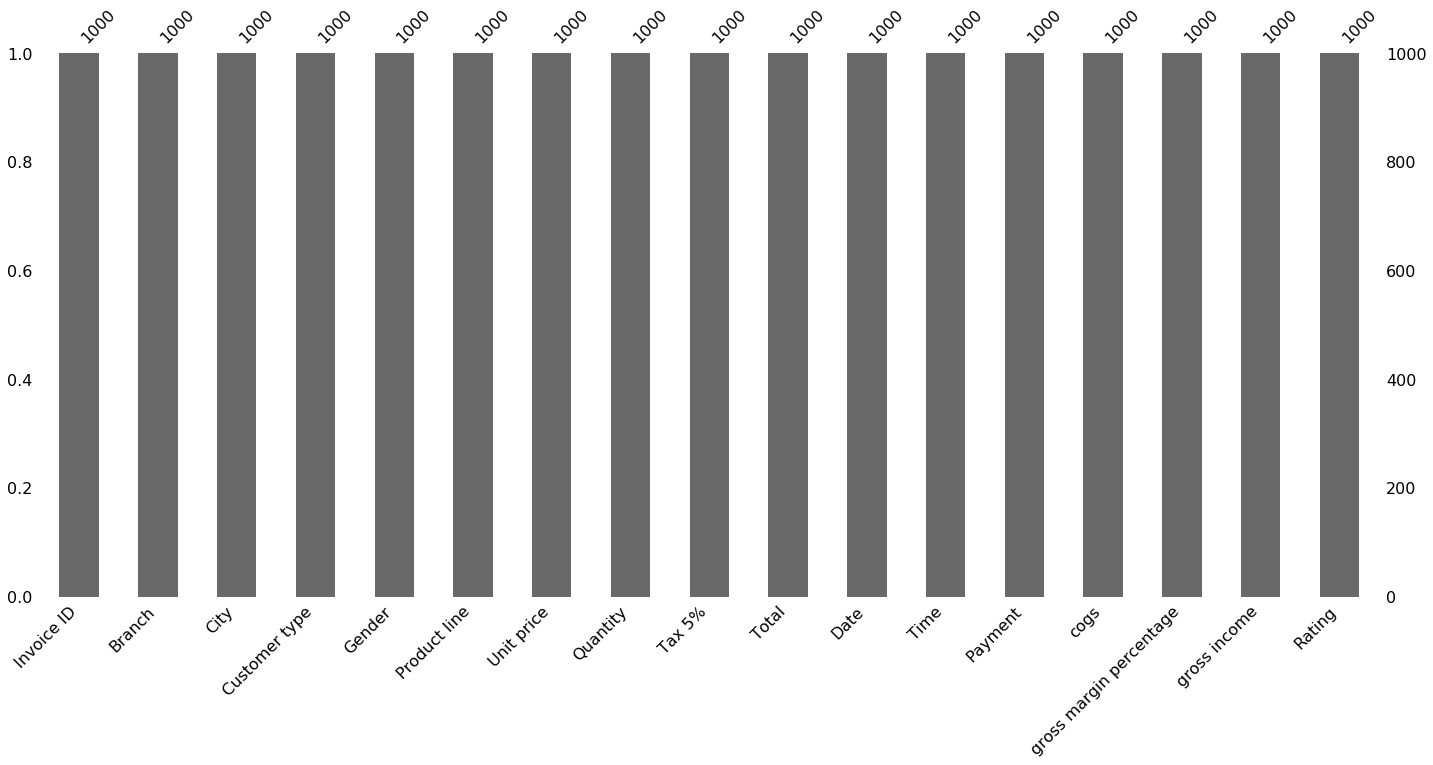

In [174]:
msno.bar(df);

- Veri setinde Boş değer yoktur :(

<a id=5></a>
# Veride düzenlemeler 

### Veri setindeki değişkenlerin isimlerinin düzenlenmesi

In [190]:
df.columns_name =  [c.lower() for c in df.columns ]

In [191]:
df.columns_name

['invoice id',
 'branch',
 'city',
 'customer type',
 'gender',
 'product line',
 'unit price',
 'quantity',
 'tax 5%',
 'total',
 'date',
 'time',
 'payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'rating']

In [198]:
df.columns = [c.replace(" " ,"_").lower() for c in df.columns ]

In [199]:
df.columns_name

['invoice_id',
 'branch',
 'city',
 'customer_type',
 'gender',
 'product_line',
 'unit_price',
 'quantity',
 'tax_5%',
 'total',
 'date',
 'time',
 'payment',
 'cogs',
 'gross_margin_percentage',
 'gross_income',
 'rating']

In [200]:
df.head(3)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


## Modelde kullanılacak Değişkenlerin seçilmesi

In [237]:
model_df = df.drop(["invoice_id" ,"branch" ,"quantity" ,"tax_5%" ,"total" ,"time" ,"cogs" ,"gross_margin_percentage" , "gross_income" ,"date"] ,axis= 1)

In [238]:
model_df 

,city,customer_type,gender,product_line,unit_price,payment,rating
0,Yangon,Member,Female,Health and beauty,74.69,Ewallet,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,Cash,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,Credit card,7.4
3,Yangon,Member,Male,Health and beauty,58.22,Ewallet,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,Ewallet,5.3
...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,Ewallet,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,Ewallet,4.4
997,Yangon,Member,Male,Food and beverages,31.84,Cash,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,Cash,4.1


## Bagımlı ve bağımsız değişkenlerin belirlenmesi

In [239]:
X = model_df.drop(["rating"] ,axis = 1)
X

,city,customer_type,gender,product_line,unit_price,payment
0,Yangon,Member,Female,Health and beauty,74.69,Ewallet
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,Cash
2,Yangon,Normal,Male,Home and lifestyle,46.33,Credit card
3,Yangon,Member,Male,Health and beauty,58.22,Ewallet
4,Yangon,Normal,Male,Sports and travel,86.31,Ewallet
...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,Ewallet
996,Mandalay,Normal,Female,Home and lifestyle,97.38,Ewallet
997,Yangon,Member,Male,Food and beverages,31.84,Cash
998,Yangon,Normal,Male,Home and lifestyle,65.82,Cash


In [240]:
y = model_df["rating"]
y

0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
995    6.2
996    4.4
997    7.7
998    4.1
999    6.6
Name: rating, Length: 1000, dtype: float64

## Object olarak değişkenleri Kategorik yapma

In [241]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           1000 non-null   object 
 1   customer_type  1000 non-null   object 
 2   gender         1000 non-null   object 
 3   product_line   1000 non-null   object 
 4   unit_price     1000 non-null   float64
 5   payment        1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [242]:
yedek_float = X.unit_price
yedek_float

0      74.69
1      15.28
2      46.33
3      58.22
4      86.31
       ...  
995    40.35
996    97.38
997    31.84
998    65.82
999    88.34
Name: unit_price, Length: 1000, dtype: float64

In [243]:
X =  X.select_dtypes("object").astype("category")

In [244]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   city           1000 non-null   category
 1   customer_type  1000 non-null   category
 2   gender         1000 non-null   category
 3   product_line   1000 non-null   category
 4   payment        1000 non-null   category
dtypes: category(5)
memory usage: 5.6 KB


In [245]:
X["unit_price"] = yedek_float

In [246]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   city           1000 non-null   category
 1   customer_type  1000 non-null   category
 2   gender         1000 non-null   category
 3   product_line   1000 non-null   category
 4   payment        1000 non-null   category
 5   unit_price     1000 non-null   float64 
dtypes: category(5), float64(1)
memory usage: 13.4 KB


## Değişkenlerde Rütbe sıralaması yapmak

- Data Framede rütbelenecek değişken yoktur , yapacağımız işlem sırası için koydum bunu (farklı verisetinde falan)

## Kategorik değişkenleri Modellemeye Hazır Hale getirmek 

In [247]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   city           1000 non-null   category
 1   customer_type  1000 non-null   category
 2   gender         1000 non-null   category
 3   product_line   1000 non-null   category
 4   payment        1000 non-null   category
 5   unit_price     1000 non-null   float64 
dtypes: category(5), float64(1)
memory usage: 13.4 KB


In [251]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()











In [ ]:
df_one_hot = pd.get_dummies(df ,columns = ["sex"] , prefix = ["sex"])

#### City değişkeninin dönüşümü

In [262]:
X["city"] = lbe.fit_transform(X["city"])
# Mandalay = 0
# Naypyitaw = 1 
# Yangon = 2



In [266]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   city           1000 non-null   int32   
 1   customer_type  1000 non-null   category
 2   gender         1000 non-null   category
 3   product_line   1000 non-null   category
 4   payment        1000 non-null   category
 5   unit_price     1000 non-null   float64 
 6   sex            1000 non-null   int8    
dtypes: category(4), float64(1), int32(1), int8(1)
memory usage: 17.2 KB


In [263]:
df

,city,customer_type,gender,product_line,payment,unit_price,sex
0,2,Member,Female,Health and beauty,Ewallet,74.69,0
1,1,Normal,Female,Electronic accessories,Cash,15.28,0
2,2,Normal,Male,Home and lifestyle,Credit card,46.33,1
3,2,Member,Male,Health and beauty,Ewallet,58.22,1
4,2,Normal,Male,Sports and travel,Ewallet,86.31,1
...,...,...,...,...,...,...,...
995,1,Normal,Male,Health and beauty,Ewallet,40.35,1
996,0,Normal,Female,Home and lifestyle,Ewallet,97.38,0
997,2,Member,Male,Food and beverages,Cash,31.84,1
998,2,Normal,Male,Home and lifestyle,Cash,65.82,1


#### customer_type değişkeninin dönüşümü

In [268]:
lbe.fit_transform(X["customer_type"])
# Member = 0
# Normal = 1

X["customer_type"] = X.customer_type.cat.codes
X.customer_type


0      0
1      1
2      1
3      0
4      1
      ..
995    1
996    1
997    0
998    1
999    0
Name: customer_type, Length: 1000, dtype: int8

#### Gender değişkeninin dönüşümü

In [250]:

X["sex"] = X.gender.cat.codes
# Female = 0 
# male = 1

In [258]:
X.city.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: city, dtype: int64

#### product_line değişkeninin dönüşümü

In [277]:
X.product_line.value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product_line, dtype: int64

In [278]:
X["product_line"] = lbe.fit_transform(X["product_line"])
# Electronic accessories = 0
# Fashion accessories  = 1
# Food and beverages = 2
# Health and beauty = 3
# Home and lifestyle = 4
# Sports and travel = 5 



#### payment değişkeninin dönüşümü

In [279]:
X.payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: payment, dtype: int64

In [280]:
X["payment"] = lbe.fit_transform(X["payment"])

In [281]:
X.head()

,city,customer_type,gender,product_line,payment,unit_price,sex
0,2,0,Female,3,2,74.69,0
1,1,1,Female,0,0,15.28,0
2,2,1,Male,4,1,46.33,1
3,2,0,Male,3,2,58.22,1
4,2,1,Male,5,2,86.31,1


In [283]:
X.drop("gender" , axis = 1 ,inplace = True)

In [284]:
X

,city,customer_type,product_line,payment,unit_price,sex
0,2,0,3,2,74.69,0
1,1,1,0,0,15.28,0
2,2,1,4,1,46.33,1
3,2,0,3,2,58.22,1
4,2,1,5,2,86.31,1
...,...,...,...,...,...,...
995,1,1,3,2,40.35,1
996,0,1,4,2,97.38,0
997,2,0,2,0,31.84,1
998,2,1,4,0,65.82,1


## Sayısal Değişkeni modellemeye Hazır hale Getirmek

## Veri setinin Train-Test Olarak Ayrılması 

In [285]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train  , y_test = train_test_split( X ,y ,test_size = 0.20  )

In [286]:
print( X_train.shape)
print( X_test.shape)
print( y_train.shape )
print( y_test.shape )

(800, 6)
(200, 6)
(800,)
(200,)


### Veri setinin Stats Model ile incelenmesi

In [315]:
import statsmodels.api as sm
lm = sm.OLS(y ,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              1075.
Date:                Fri, 01 May 2020   Prob (F-statistic):                        0.00
Time:                        17:24:33   Log-Likelihood:                         -2383.6
No. Observations:                1000   AIC:                                      4779.
Df Residuals:                     994   BIC:                                      4809.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
city              0.9453      0.095      9.924      0.000       0.758       1.132
customer_type     1.2366      0.159      7.762      0.000       0.924       1.549
product_line      0.4383      0.045      9.815      0.000       0.351       0.526
payment           0.7551      0.095      7.935      0.000       0.568       0.942
unit_price        0.0451      0.002     18.049      0.000       0.040       0.050
sex               0.9852      0.162      6.091      0.000       0.668       1.303
==============================================================================
Omnibus:                        7.784   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                5.608
Skew:                           0.037   Prob(JB):                       0.0606
Kurtosis:                       2.641   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
model.params
# modelimizdeki  katsayılarıdır 


city             0.945304
customer_type    1.236579
product_line     0.438268
payment          0.755087
unit_price       0.045098
sex              0.985219
dtype: float64

In [308]:
model.conf_int()
# modelimizdek güven aralıklarını getirir

,0,1
city,0.758379,1.132228
customer_type,0.923945,1.549214
product_line,0.350643,0.525893
payment,0.568354,0.941819
unit_price,0.040195,0.050001
sex,0.667830,1.302608


In [309]:
pv = model.f_pvalue
# modelimizdek pvalue değerini getirir
print("p-value = ", "%.5f" % pv)
# p value değeri modelimizin anlamlı olduğunu belirtmektedir 

p-value =  0.00000


In [310]:
model.mse_model
# model hata kareleri toplamı 
# birim başı hatsı çok yüksektir

7447.33789834222

In [311]:
model.rsquared
# r kare değeri ( açıkanabilirlik değerini ) getirmek için kullanırız 

0.8664882405388288

In [312]:
model.rsquared_adj
# düzeltilmiş r kare değeri 

0.8656823345461054

In [316]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [317]:
lm = lm.fit(X_train , y_train)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [319]:
lm.coef_
# b1 ,b2 ,b3 vs katsayıları 

array([ 0.03378353,  0.04173101,  0.0121915 , -0.0318036 , -0.00185244,
        0.04581818])

In [320]:
lm.intercept_ 
# b0 sabiti

7.0442478913811515

In [321]:
lm.score(X_train ,y_train)
#r kare değeri 


0.0017562778322995909

### Tahminde bulunma 

In [322]:
y_pred = lm.predict(X_test)
# elimizdeki test setini test ediyoruz 

In [325]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
rmse

1.7823495509107388

In [326]:
scores = cross_val_score(lm,
              X_train,
              y_train,
              cv = 10,
              scoring = "r2")
# Yukarada sadece  tek bir scrlama aldık şimdi ise
# 10 katlı çaprazlama yapıp bir scor elde ettik 

print(str(scores) ,"\n")
print("score mean : "  ,str(scores.mean()))

[-0.01038941 -0.00955766 -0.00937781 -0.02997532 -0.0057041  -0.24641256
 -0.09769173 -0.01311309 -0.09198622 -0.0596041 ] 

score mean :  -0.05738119835906348


In [327]:
RMSE = np.sqrt(-cross_val_score(lm , # model'i giriyoruz
                X_train, 
                y_train,
                cv = 10 , # Kaç katlı caprazlama yapacaksak onu giriyoruz
                scoring = "neg_mean_squared_error" #istediğimiz hata türü
))
# burada değerlerimiz negatif geldiği için onune - işareti koyduk 
RMSE

array([1.6494547 , 1.63213643, 1.75219795, 1.78539768, 1.75205852,
       1.86377476, 1.74868175, 1.68104513, 1.79655863, 1.52544963])

In [328]:
RMSE.mean()
# orlama hatamız 

1.718675518423985

# Model Kurma (Random Forest)(Rasgele model denedim tartışmayalım )

In [287]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor( random_state = 24 )
rf_model.fit( X_train ,y_train )
y_pred = rf_model.predict(X_test)

In [288]:
np.sqrt( mean_squared_error(y_test ,y_pred) )

1.8996199369873965

# Model Tuning

In [289]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [290]:
rf = RandomForestRegressor(random_state  = 24)
rf_params = {
    "n_estimators" :[100 ,500 ,1000],
    "max_depth" : list(range(1 ,10))}

rf_cv = GridSearchCV( rf,
                    rf_params ,
                    cv  =10 ,
                    n_jobs = -1,
                    verbose = 2).fit( X_train ,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   32.8s finished


In [291]:
rf_cv.best_params_

{'max_depth': 1, 'n_estimators': 500}

# Final Modeli

In [294]:
rf_tuned = RandomForestRegressor( max_depth = 2,
                                n_estimators = 100).fit(X_train ,y_train)

In [295]:
y_pred = rf_tuned.predict( X_test )
np.sqrt( mean_squared_error( y_test ,y_pred) )

1.800436772804538

In [296]:
rf_tuned.feature_importances_

array([0.03870424, 0.00581526, 0.20206992, 0.02865954, 0.70908731,
       0.01566373])

In [297]:
Importance = pd.DataFrame({"Importance" : rf_tuned.feature_importances_*100} ,
                         index = X_train.columns)

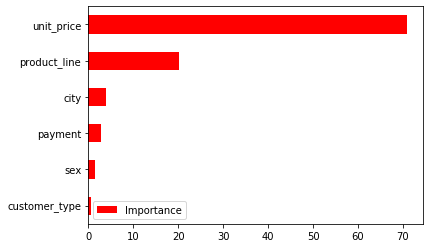

In [298]:
Importance.sort_values(by = "Importance" ,
                        axis = 0,
                      ascending= True).plot(kind = "barh" ,color = "red");